In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates

plt.style.use('dark_background')


In [2]:
df = pd.read_excel(
    '/Users/baart_f/data/drought/salt/Zoutlast_ZSF_IJmuiden_20220117-20230124_daggemiddeldes_weekgemiddeldes.xlsx', 
    skiprows=5,
    names=['t', 'salt transport (day) [kg/s]', ' salt transport (week) [kg / s]']
)
df



,t,salt transport (day) [kg/s],salt transport (week) [kg / s]
0,2022-01-17 01:00:00,325,347
1,2022-01-18 01:00:00,143,309
2,2022-01-19 01:00:00,291,301
3,2022-01-20 01:00:00,416,310
4,2022-01-21 01:00:00,391,318
...,...,...,...
368,2023-01-20 01:00:00,375,245
369,2023-01-21 01:00:00,157,220
370,2023-01-22 01:00:00,289,218
371,2023-01-23 01:00:00,156,224


In [3]:

t_0 = datetime.datetime(2022, 7, 19)
t_1 = datetime.datetime(2022, 9, 23)

df['regime'] = 1


In [4]:
df.loc[df.t < t_0, 'regime'] = 0
df.loc[df.t >= t_1, 'regime'] = 2

In [5]:
# select periods over regimes
periods = (
    df
    .groupby('regime')
    .agg(['min', 'max', 'mean'])
    [
        [
            ('t', 'min'), 
            ('t', 'max'), 
            ('salt transport (day) [kg/s]', 'mean')
        ]
    ]
)

In [6]:
periods

t                     salt transport (day) [kg/s]
                       min                 max                        mean
regime                                                                    
0      2022-01-17 01:00:00 2022-07-18 02:00:00                  333.393443
1      2022-07-19 02:00:00 2022-09-22 02:00:00                  181.363636
2      2022-09-23 02:00:00 2023-01-24 01:00:00                  321.427419

Text(0.5, 1.0, 'IJmuiden zout transport')

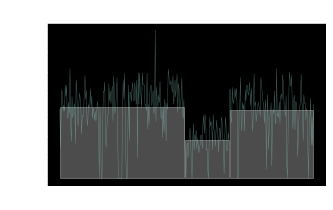

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))

months = matplotlib.dates.MonthLocator((1,4,7,10))

ax.plot(df['t'], df['salt transport (day) [kg/s]'], alpha=0.5, linewidth=0.4)
# ax.plot(periods)

for i, row in periods.iterrows():
    t_min = row[('t', 'min')]
    t_max = row[('t', 'max')]
    val = row[('salt transport (day) [kg/s]', 'mean')]
    ax.fill_between([t_min, t_max], 0, val, alpha=0.3, color='white')
ax.xaxis.set_major_locator(months)
ax.set_ylabel('zout transport [kg/s]')
ax.set_title('IJmuiden zout transport')

In [8]:
delta_t = (t_1 - t_0).total_seconds()
delta_salt = 320 - 180

# https://www.transport-online.nl/site/126435/rijkswaterstaat-strooide-in-hele-winter-135-miljoen-kilo-zout/
reduced_salt = (delta_t * delta_salt)
# n x salt used per winter by RWS
reduced_salt / 135000000

5.9136

In [9]:
fig.savefig('/Users/baart_f/src/drought-scrolly/example/drought-scrolly/images/figures/salt.png')

In [10]:
reduced_salt

798336000.0

In [11]:
35g / l

SyntaxError: invalid syntax (1106088264.py, line 1)